# Aula 04 - Revisão e Exercícios

###  

__1)__ Utilizando a base de [Heart Failure](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data), desenvolver um classificador a partir de uma regressão logística.

In [1]:
# importe as principais bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, r2_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Carrega o dataset
df = pd.read_csv('../datasets/heart_failure.csv')

In [ ]:
# Primeiros registros
df.head()

In [ ]:
# Verificando as infos do dataset
df.info()

In [5]:
#Dados Faltantes
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

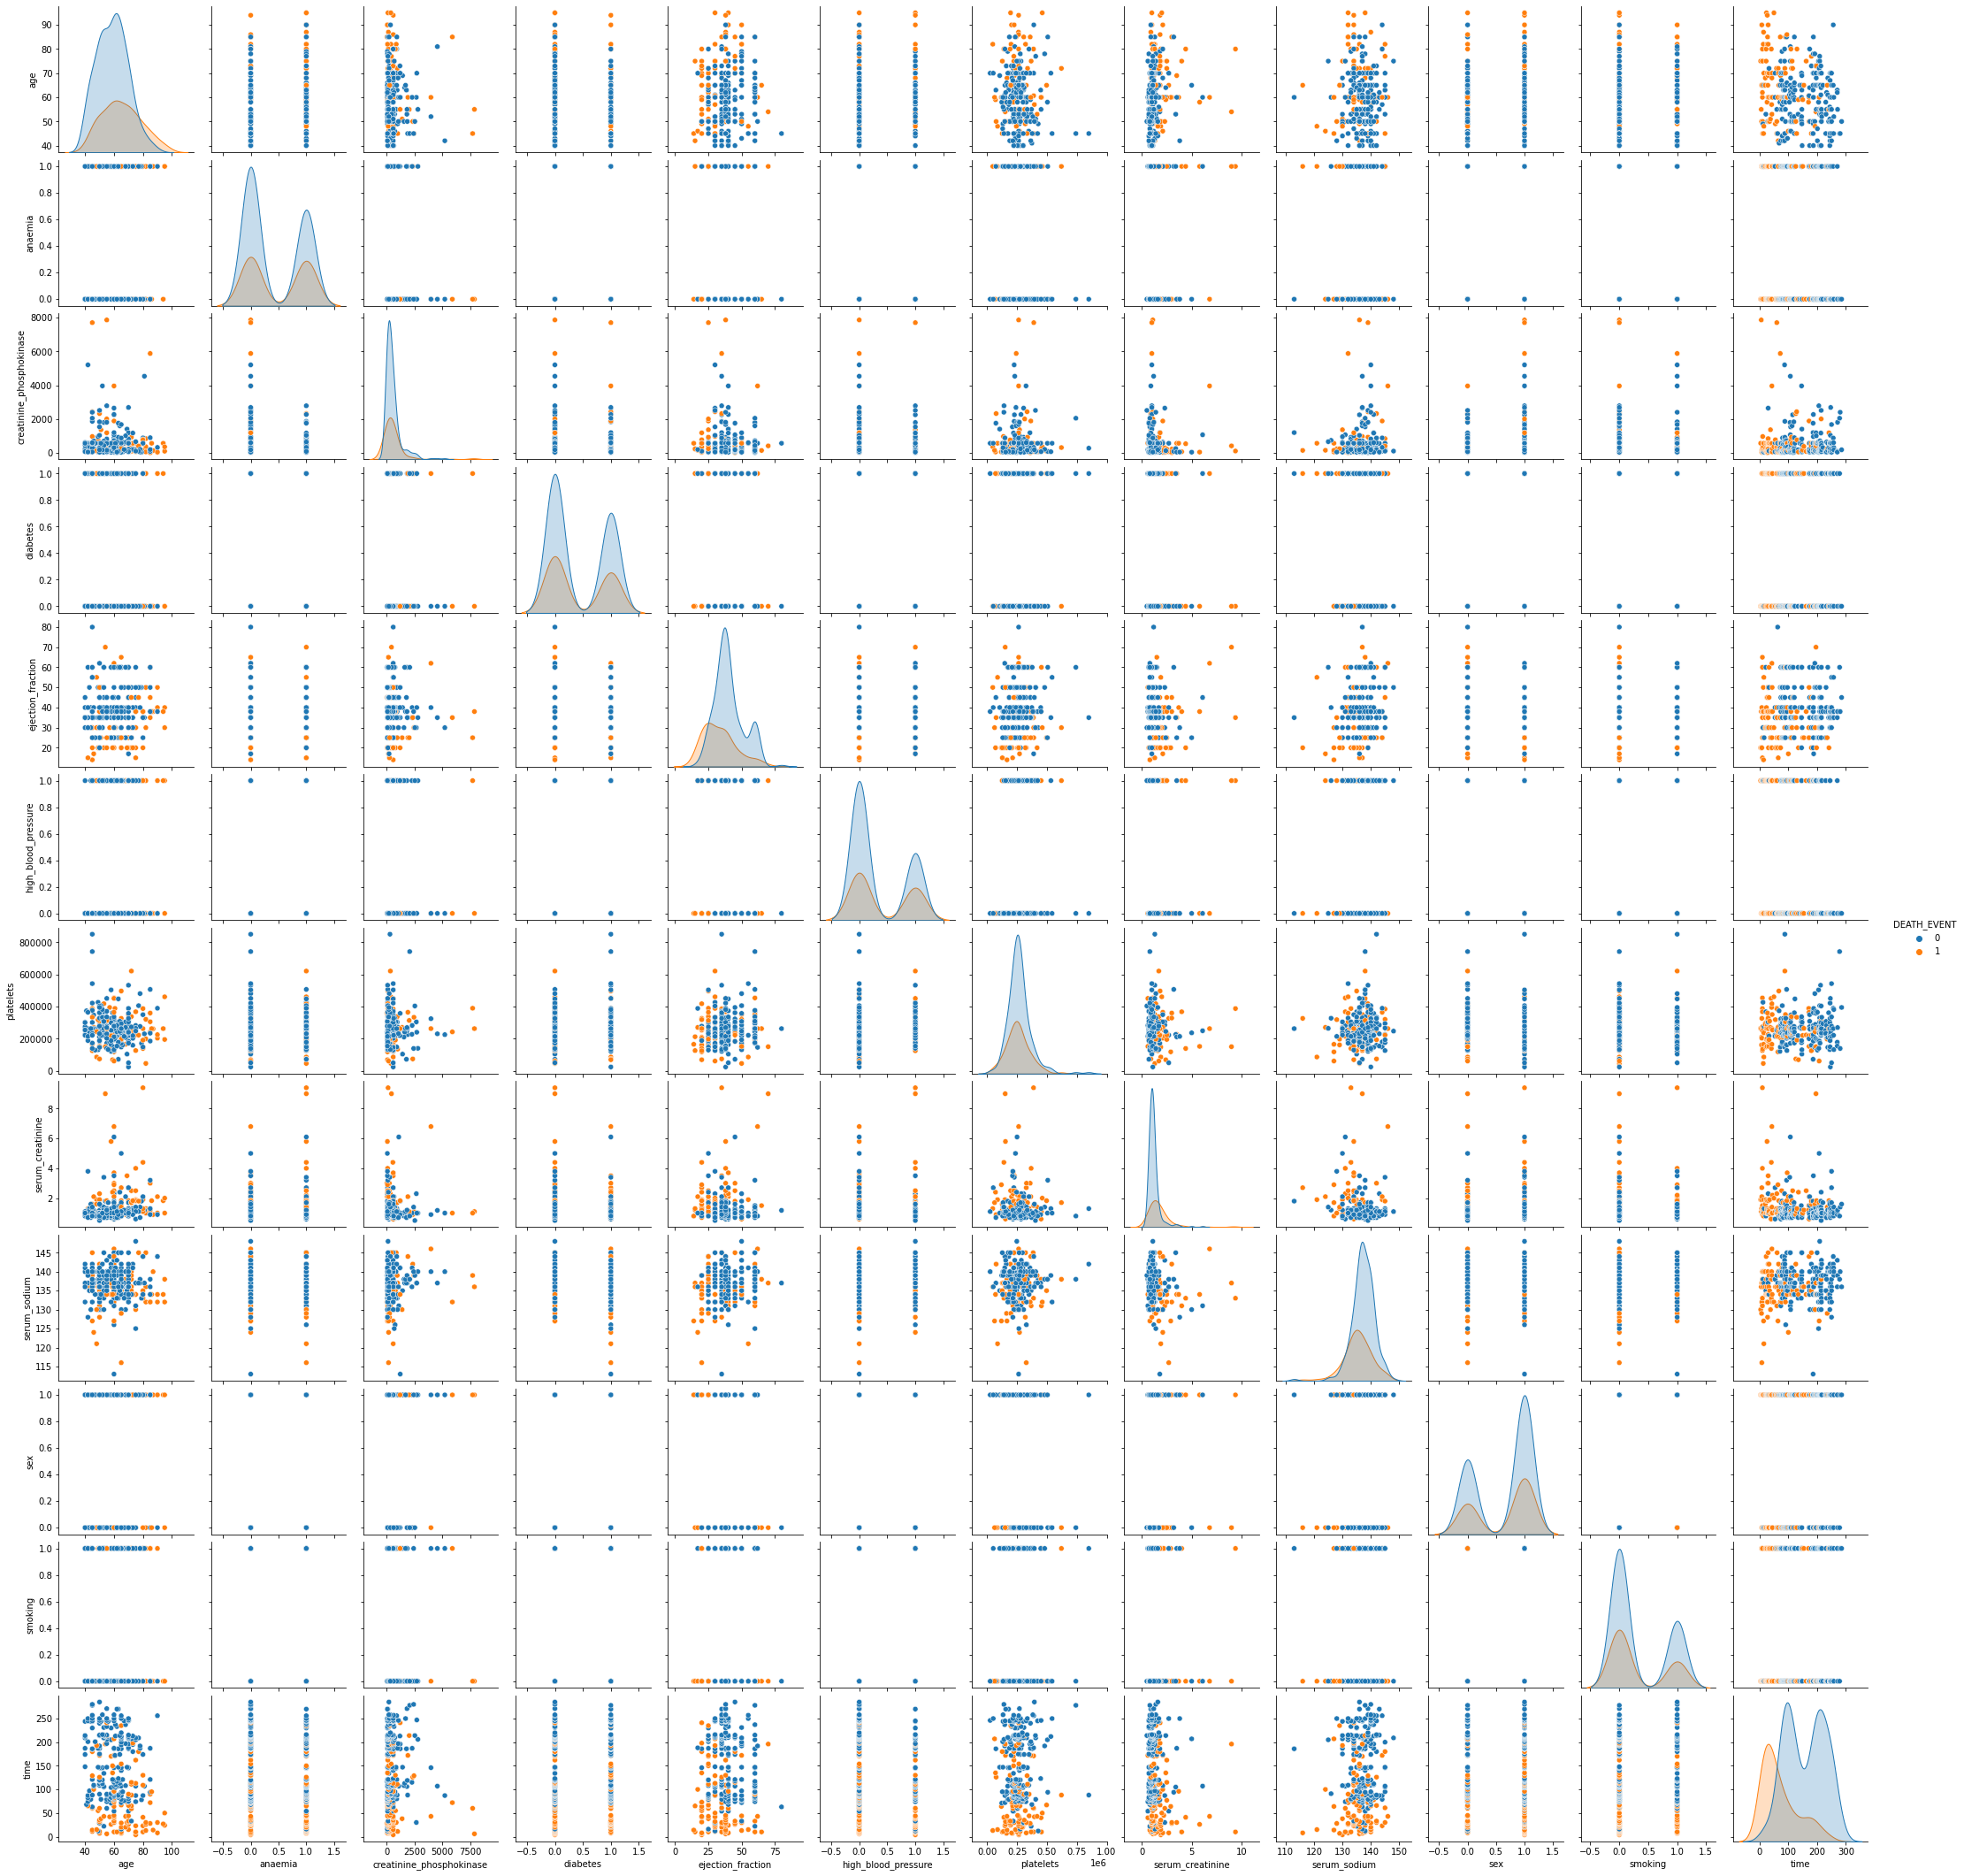

In [6]:
# Pairplot para visualizar a relação das variáveis
sns.pairplot(df, hue = 'DEATH_EVENT')
plt.show()

In [8]:
# Proporção entre as classes
df['DEATH_EVENT'].value_counts(normalize = True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

In [9]:
# Separando em X e Y
X = df.drop(['DEATH_EVENT'], axis = 1)
y = df['DEATH_EVENT']

In [10]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y)

In [11]:
# Proporção para o treino
y_train.value_counts(normalize = True)

0    0.679426
1    0.320574
Name: DEATH_EVENT, dtype: float64

In [12]:
# Proporção para o teste
y_test.value_counts(normalize = True)

0    0.677778
1    0.322222
Name: DEATH_EVENT, dtype: float64

In [13]:
# Instancia a Normalização
scaler = StandardScaler()

In [14]:
# normalização
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [15]:
X_train_std

array([[-0.94710704, -0.93062959, -0.01780716, ..., -1.35067551,
        -0.64943722,  0.57201032],
       [-1.38113418,  1.07454138, -0.52026537, ...,  0.74037028,
        -0.64943722,  1.32202754],
       [-0.07905275, -0.93062959, -0.5329242 , ..., -1.35067551,
        -0.64943722, -0.52715284],
       ...,
       [ 0.70219611, -0.93062959, -0.01780716, ...,  0.74037028,
         1.53979471, -0.70819147],
       [-1.03391246,  1.07454138, -0.5173441 , ..., -1.35067551,
        -0.64943722,  0.24872704],
       [-0.94710704, -0.93062959, -0.22521723, ...,  0.74037028,
        -0.64943722, -0.48835884]])

In [16]:
X_test_std

array([[-0.77349618, -0.93062959, -0.45599746, ...,  0.74037028,
         1.53979471, -0.20386955],
       [-0.25266361,  1.07454138, -0.52902918, ...,  0.74037028,
         1.53979471,  0.99874426],
       [ 1.22302868,  1.07454138, -0.50565903, ...,  0.74037028,
         1.53979471, -1.52286534],
       ...,
       [-1.64155046, -0.93062959, -0.48521015, ...,  0.74037028,
        -0.64943722, -0.69526014],
       [ 0.78900154, -0.93062959, -0.01780716, ...,  0.74037028,
         1.53979471, -1.25130739],
       [-0.07905275,  1.07454138,  0.00653675, ...,  0.74037028,
         1.53979471, -0.95388677]])

In [17]:
# Instanciar o modelo
model = LogisticRegression()

In [18]:
# Fit do Modelo
model.fit(X_train_std, y_train)

LogisticRegression()

In [20]:
# Gera os predicts
y_pred = model.predict(X_test_std)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        61
           1       0.79      0.66      0.72        29

    accuracy                           0.83        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.83      0.83      0.83        90



In [22]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[56,  5],
       [10, 19]], dtype=int64)

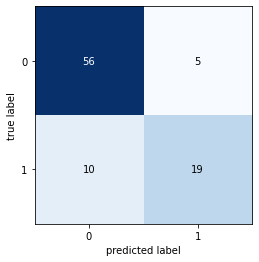

In [23]:
# Plot da Matriz
plot_confusion_matrix(conf_mat = cm)
plt.show()

##  

**2)** [Admissão em Faculdades para Estudantes Indianos](https://www.kaggle.com/mohansacharya/graduate-admissions): Esses dados estão no dataset *Admission_Predict.csv* e nele encontramos alguns dados sobre estudantes indianos que tem interesse em ingressar na Universidade. As variáveis que estão disponíveis são:

- GRE Scores
- TOEFL Scores
- University Rating
- SOP: Statement of Purpose 
- LOR: Letter of Recommendation Strength
- CGPA: Undergraduate GPA
- Research Experience
- Chance of Admit

Utilize agora uma regressão Linear para predizer a chance de admissão dos alunos a partir de seus dados.

In [27]:
# Carregar os dados
grades = pd.read_csv('./datasets/Admission_Predict.csv', index_col = 0)

In [28]:
# Primeiros registros
grades.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
# Principais Estatisticas
grades.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


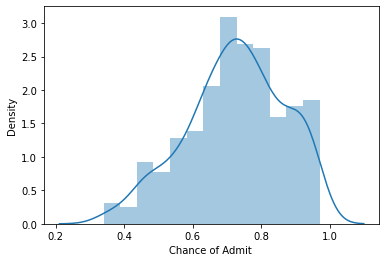

In [30]:
# Distribuição
sns.distplot(grades['Chance of Admit '])
plt.show()

In [31]:
# Separação em X e y
X = grades.drop(['Chance of Admit '], axis = 1)
y = grades['Chance of Admit ']

In [32]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [33]:
# Instancia a Normalização
scaler = StandardScaler()

In [34]:
# Normalização
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [36]:
# Instancia o modelo
model = LinearRegression()

In [37]:
# fit do modelo
model.fit(X_train_std, y_train)

LinearRegression()

In [39]:
# Predict do modelo
y_pred = model.predict(X_test_std)
y_pred

array([0.64734197, 0.72165881, 0.93540267, 0.82079041, 0.57781233,
       0.9282453 , 0.52898217, 0.54049852, 0.6642913 , 0.84453894,
       0.72491972, 0.91192259, 0.55014279, 0.88795065, 0.70151728,
       0.69045265, 0.66999264, 0.48163309, 0.69099994, 0.97632508,
       0.59207825, 0.65665649, 0.71377809, 0.53497985, 0.95093543,
       0.810305  , 0.69409622, 0.56684368, 0.67946535, 0.81457938,
       0.81022743, 0.94667098, 0.64560622, 0.51450621, 0.66361741,
       0.67144094, 0.7235074 , 0.6480692 , 0.61989951, 0.88414197,
       0.74108467, 0.59701292, 0.77704183, 0.96177165, 0.84899462,
       0.83589569, 0.95175439, 0.65471687, 0.92257385, 0.85934346,
       0.89351388, 0.72601699, 0.78377786, 0.95276909, 0.57555615,
       0.59192473, 0.69115154, 0.84305695, 0.60189253, 0.84517226,
       0.66665763, 0.65574046, 0.7006315 , 0.50851903, 0.63275593,
       0.71371096, 0.61905871, 0.84500458, 0.85769092, 0.79819613,
       0.72154137, 0.82117028, 0.87634528, 0.83168876, 0.52556

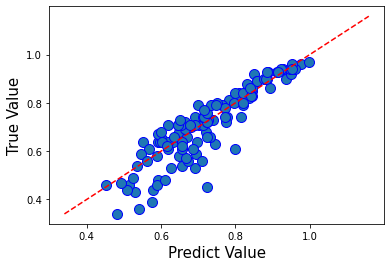

In [40]:
# Plot dos valores preditos pelos reais
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("True Value", fontsize=15)
plt.xlabel("Predict Value", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

In [41]:
# Calculo R2
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

R2 : 0.7955991554684619


## 

__3)__  Utilizando a base de dados `insurance.csv`, utilize os seguintes modelos:

- __A)__ Utilize um modelo de Regressão Linear para chegar nos valores de seguros cobrados;
- __B)__ Utilize um modelo de Regressão Logística para fazer a classificação das classes de seguros;

__DICA:__ Faça uma avaliação entre a idade e o total de seguro pago para entender a relação das variáveis e separar em algumas regiões

In [42]:
# Carrega os dados
insurance = pd.read_csv('./datasets/Insurance.csv')

In [43]:
# Primeiros registros
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
# Dados Faltantes
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [45]:
# Criando novas features para sexo e fumante
insurance['sexo'] = np.where(insurance['sex'] == 'male', 1, 0)
insurance['fumante'] = np.where(insurance['smoker'] == 'yes', 1, 0)

In [46]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,sexo,fumante
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [47]:
# Get dummies
insur_dummies = pd.get_dummies(insurance,
                               prefix_sep = '_',
                               columns = ['region'],
                               drop_first = True)

In [48]:
insur_dummies.head()

,age,sex,bmi,children,smoker,charges,sexo,fumante,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,1,0,0


In [49]:
# dropando as variaveis sex e smoker
insur_dummies.drop(['sex', 'smoker'], axis = 1, inplace = True)

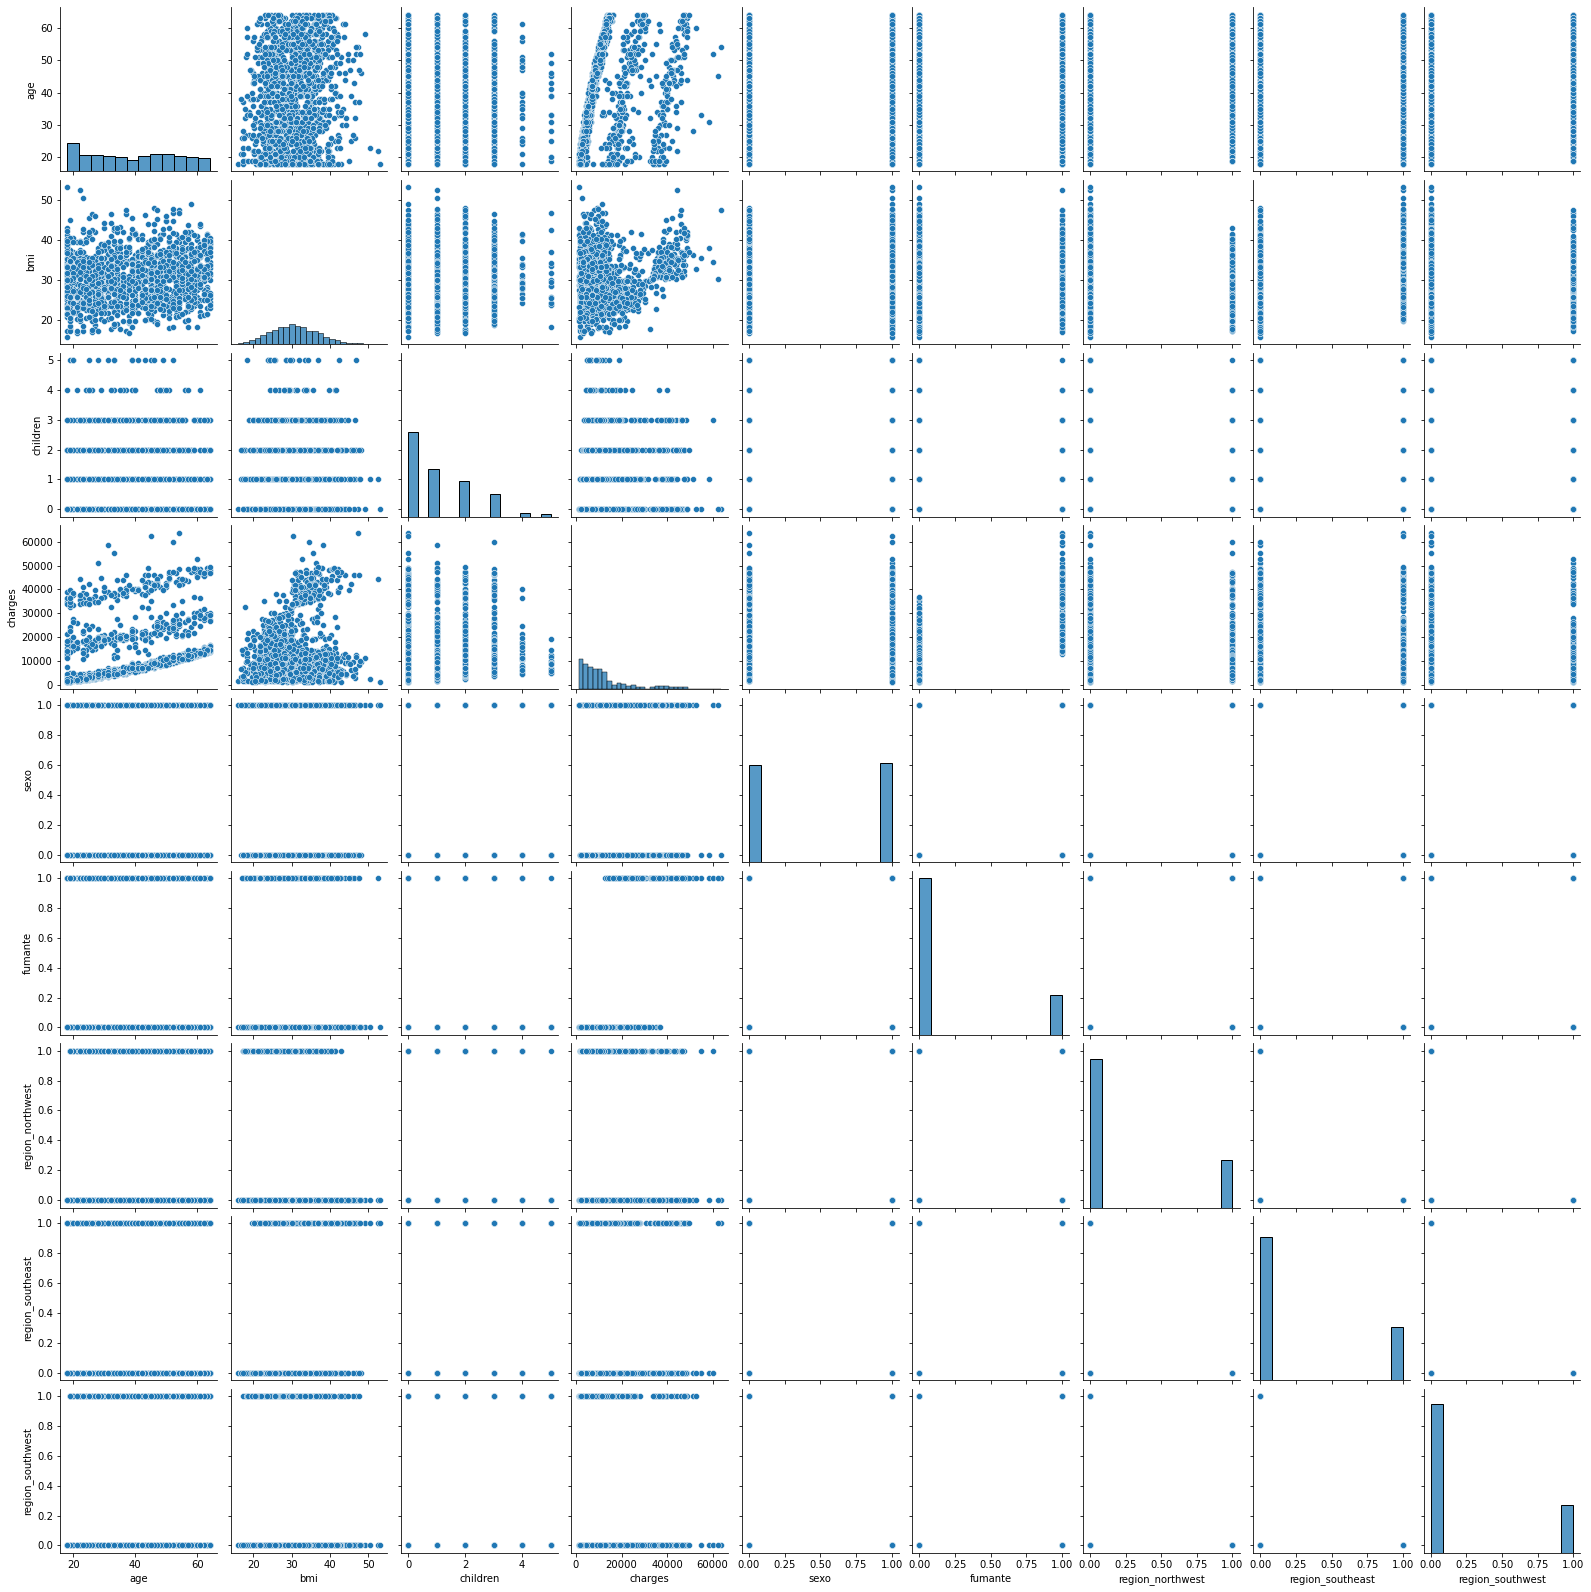

In [50]:
# Pairplot
sns.pairplot(insur_dummies)
plt.show()

In [51]:
# Spearando em X e Y
X = insur_dummies.drop(['charges'], axis = 1)
y = insur_dummies['charges']

In [52]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [53]:
# Instancia a Normalização
scaler = StandardScaler()

In [54]:
# Normalização
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [55]:
# Instancia o modelo
model = LinearRegression()

In [56]:
# fit do modelo
model.fit(X_train_std, y_train)

LinearRegression()

In [57]:
# Predict do modelo
y_pred = model.predict(X_test_std)
y_pred

array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
        2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
        9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
        4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
        1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
        3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
        1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
        1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
        4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
        1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
        3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
        8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
        3.54465532e+04,  9.10285846e+03,  1.57820945e+04,  2.13473894e+03,
        1.24668220e+04,  

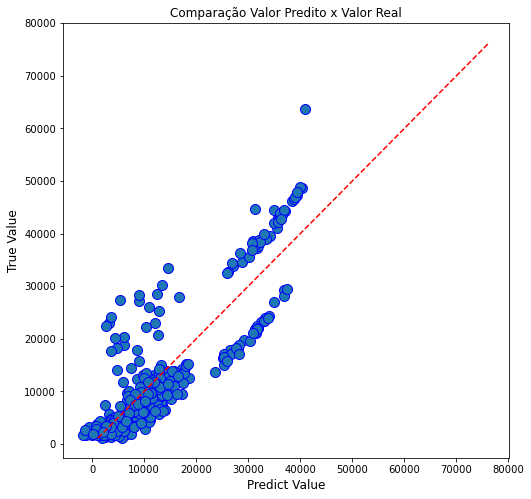

In [58]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [59]:
# R2
R2 = r2_score(y_test, y_pred)
print('R2: ', R2)

R2:  0.769611805436901


__ITEM B__

In [60]:
# Voltando
insur_dummies.head()

,age,bmi,children,charges,sexo,fumante,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


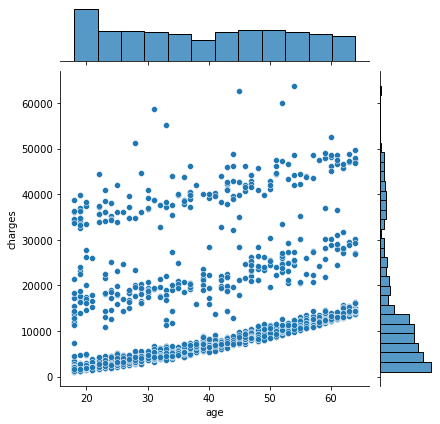

In [61]:
# Jointplot - Age x Charges
sns.jointplot(data = insur_dummies,
              x = 'age',
              y = 'charges')
plt.show()

In [62]:
# Criando a target
insur_dummies['target'] = np.where(insur_dummies['charges'] <= 10000, 0, 
                                   np.where(insur_dummies['charges'] <= 30000, 1, 2))

In [63]:
# Proporção da target
insur_dummies['target'].value_counts(normalize = True)

0    0.532138
1    0.346786
2    0.121076
Name: target, dtype: float64

In [64]:
# Separação X e y
X = insur_dummies.drop(['target', 'charges'], axis = 1)
y = insur_dummies['target']

In [65]:
# Separação treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y)

In [66]:
# Instancia a normalização
scaler = StandardScaler()

In [67]:
# Normaliza os dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [68]:
# isntancia o modelo
model = LogisticRegression()

In [70]:
# Fit do modelo
model.fit(X_train_std, y_train)

LogisticRegression()

In [72]:
# Gera as prediçoes
y_pred = model.predict(X_test_std)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1,
       2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1,
       2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0,
       1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0,

In [73]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       214
           1       0.83      0.85      0.84       139
           2       0.96      0.88      0.91        49

    accuracy                           0.89       402
   macro avg       0.90      0.88      0.89       402
weighted avg       0.89      0.89      0.89       402



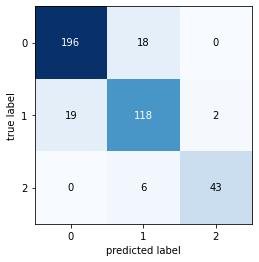

In [74]:
# Cria a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()